In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

#### load data 

data attributes
- crim - per capita crime rate by town
- zn - proportion of residential land zoned for lots over 25,000 sq.ft.
- indus - proportion of non-retail business acres per town.
- chas - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- nox  - nitric oxides concentration (parts per 10 million)
- rm- average number of rooms per dwelling
- age - proportion of owner-occupied units built prior to 1940
- dis - weighted distances to five Boston employment centres
- rad  - index of accessibility to radial highways
- tax - full-value property-tax rate per $10,000
- ptratio - pupil-teacher ratio by town
- b - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- lstat - % lower status of the population
- medv [target] - Median value of owner-occupied homes in $1000's

In [2]:
data=pd.read_csv('housing.csv')

In [3]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [4]:
data.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.shape

(506, 14)

In [8]:
# number of unique values
data.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64


- chas and rad are categorical

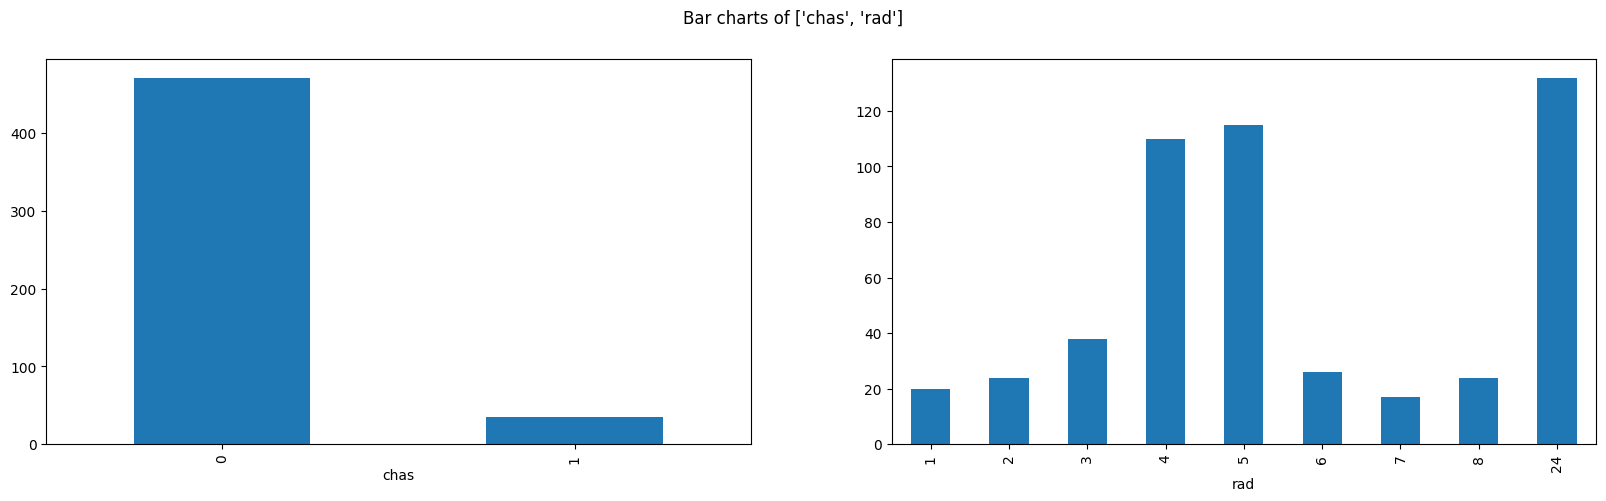

In [9]:
# visualize categorical features
def plot_categorical(data, cols):
    fig, subPlot=plt.subplots(nrows=1, ncols=len(cols), figsize=(20,5))
    fig.suptitle(f'Bar charts of {cols} ')

    for col, plotNumber in zip(cols, range(len(cols))):
        data.groupby(col).size().plot(kind='bar',ax=subPlot[plotNumber])
        
plot_categorical(data, cols=['chas','rad'])

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'dis'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>],
       [<Axes: title={'center': 'b'}>, <Axes: title={'center': 'lstat'}>,
        <Axes: >]], dtype=object)

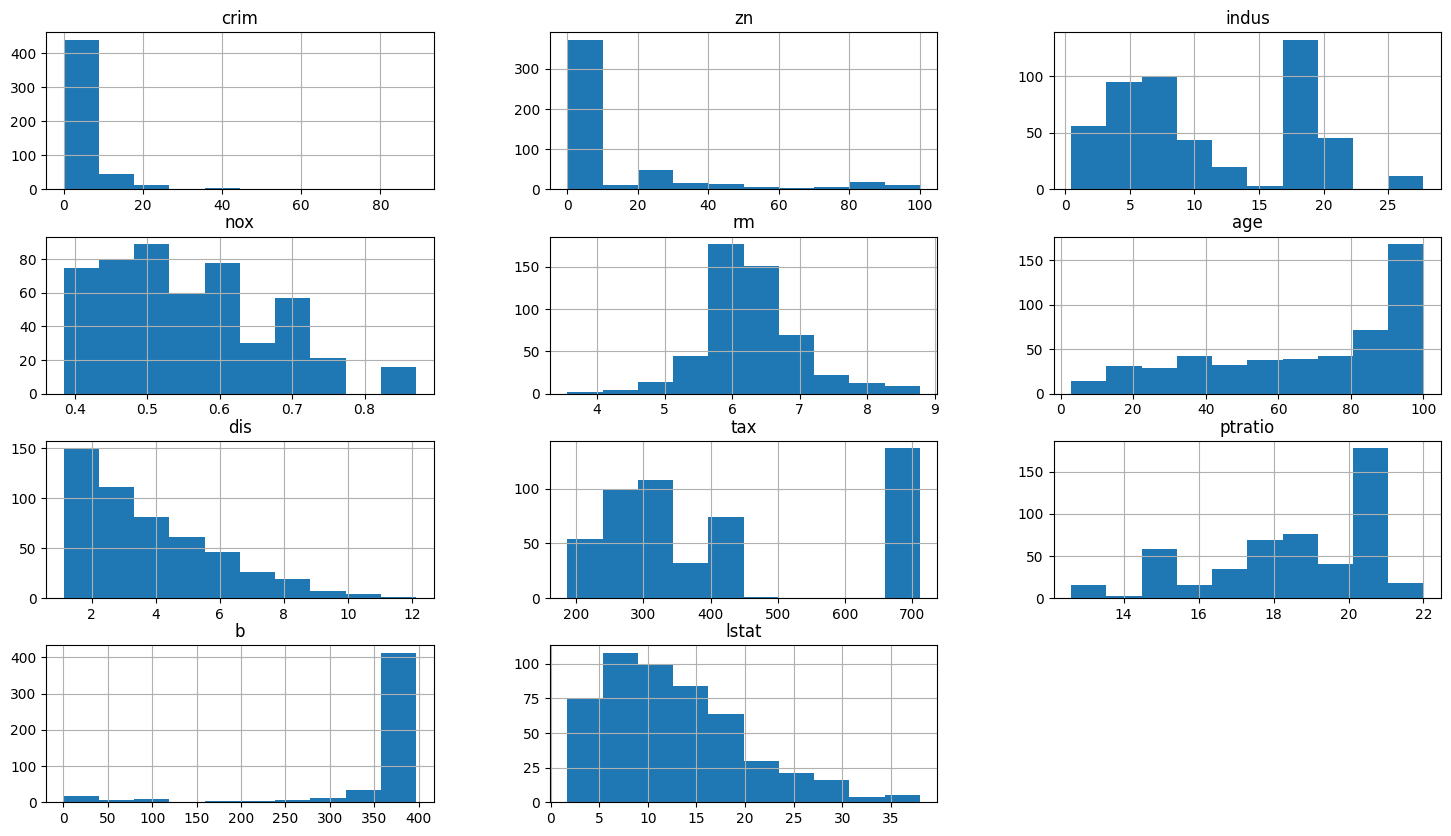

In [10]:
# visualize numerical features

data.hist(['crim', 'zn', 'indus',  'nox', 'rm', 'age', 'dis','tax','ptratio', 'b', 'lstat'], figsize=(18,10))

In [11]:
#check missing values
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<Axes: >

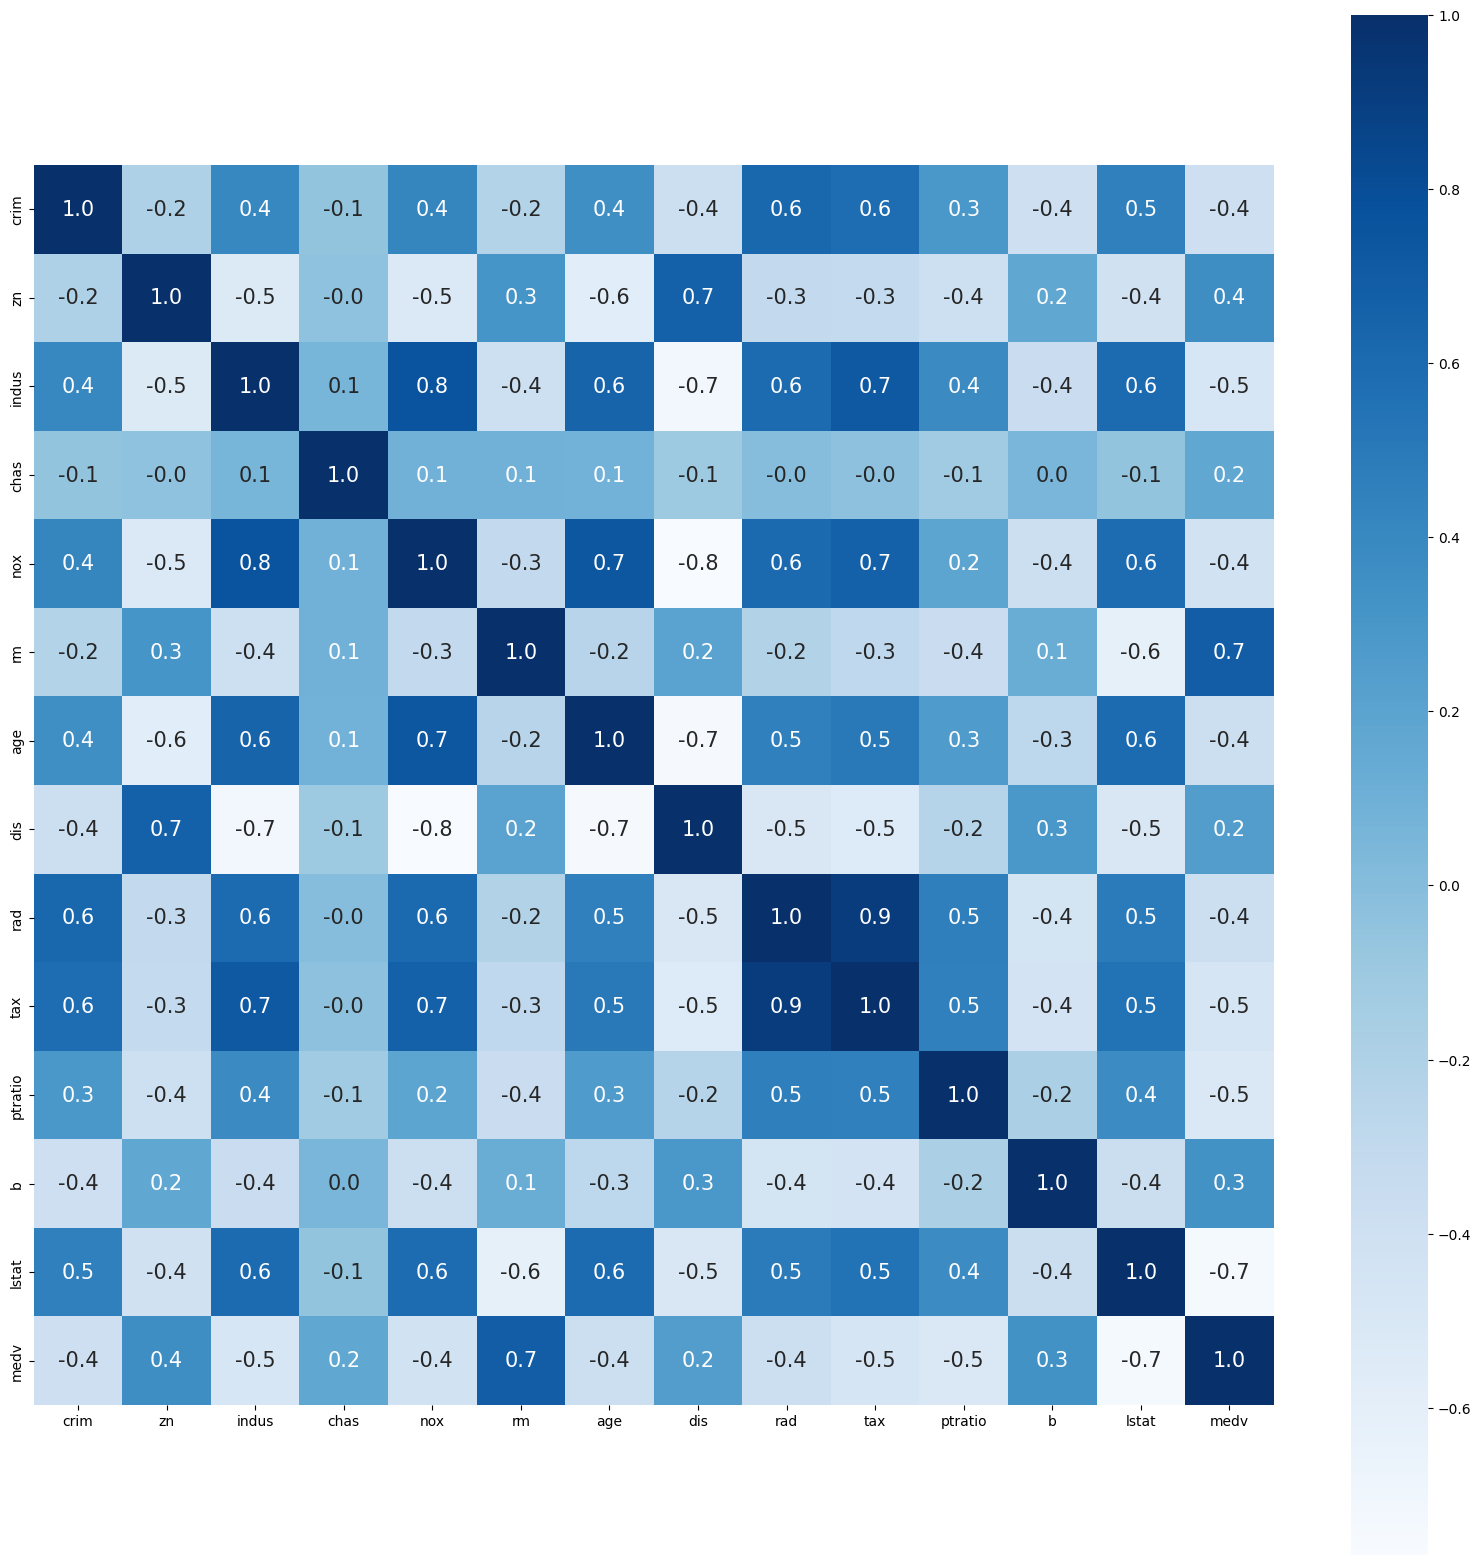

In [12]:
# correlation between features
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

##### relationship between continuous variables and target

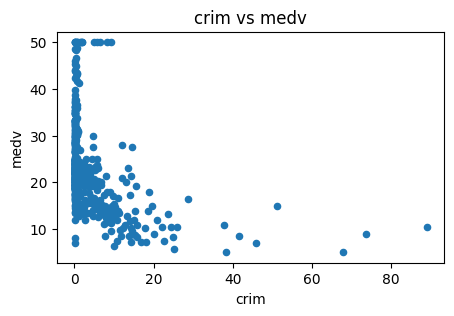

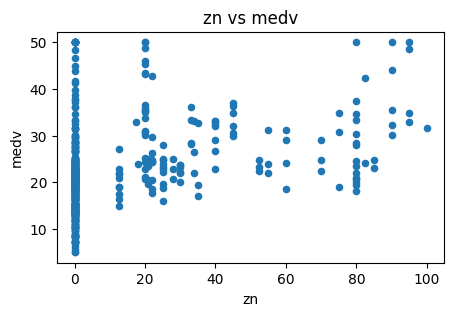

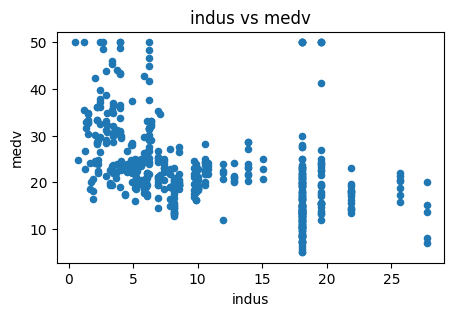

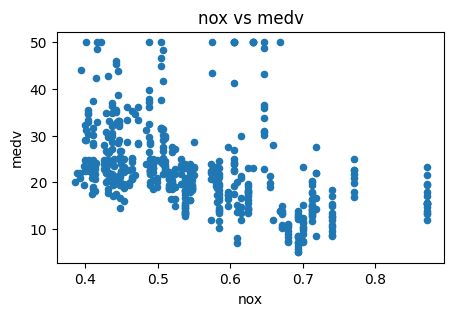

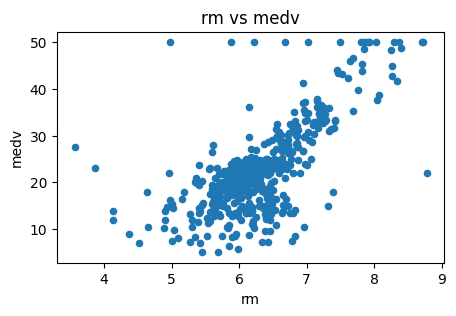

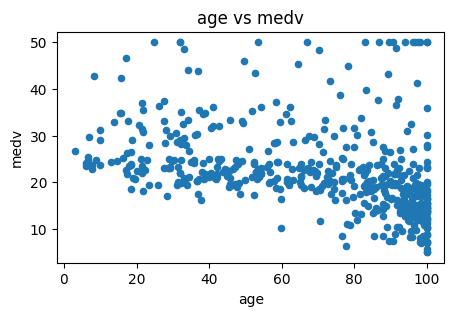

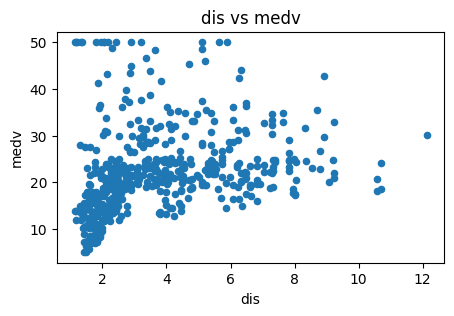

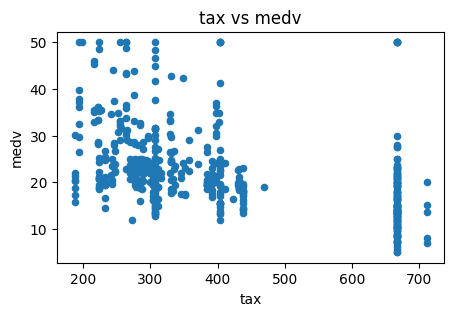

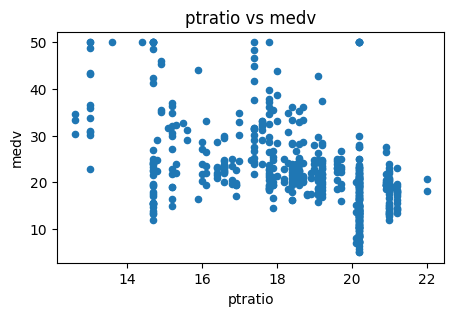

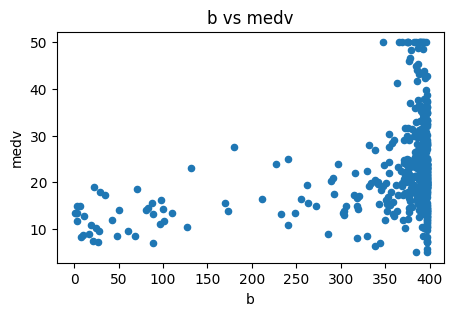

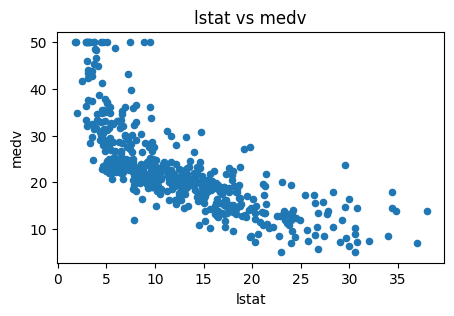

In [13]:
# relationship between continuos variables and target
#check for trends: increasing (positively correlated), descreasing (negatively correlated), no trend
continuous_cols =['crim', 'zn', 'indus',  'nox', 'rm', 'age', 'dis','tax','ptratio', 'b', 'lstat']
for var in continuous_cols:
    data.plot.scatter(x=var, y='medv', figsize=(5,3), title=f"{var} vs medv")

#### relationship between categorical variables and target
- if distribution looks similar for each category (boxes are in same line) --> variable has NO effect on the target variable.
- if distribution is different for each category (boxes are not in same line!) --> variables might be correlated with target


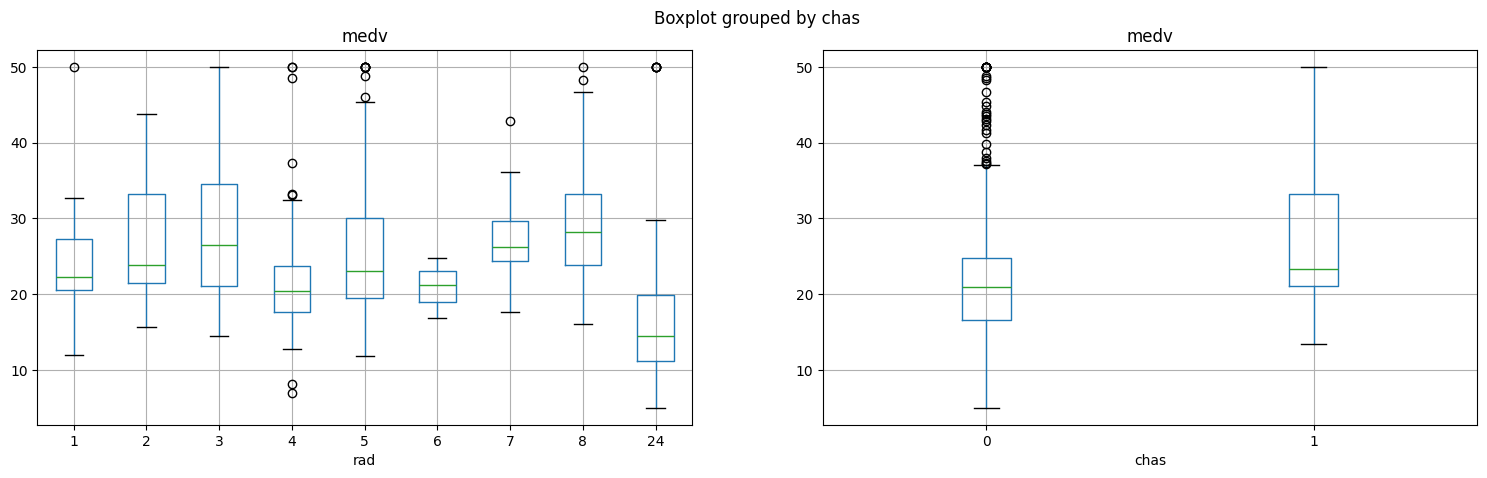

In [14]:
categorical_cols=['rad', 'chas']

fig, ax=plt.subplots(nrows=1, ncols=len(categorical_cols), figsize=(18,5))
for var , i in zip(categorical_cols, range(len(categorical_cols))):
    data.boxplot(column='medv', by=var, figsize=(5,5), vert=True, ax=ax[i])

##### distribution of target

<Axes: >

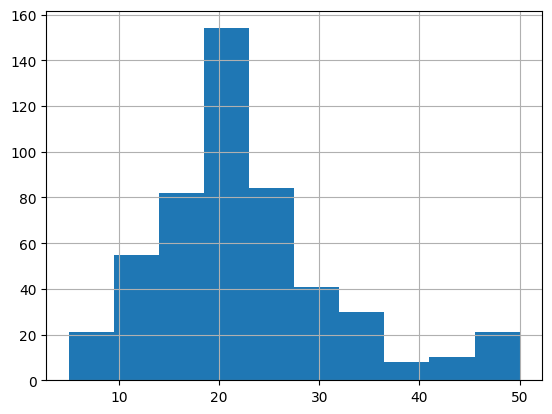

In [15]:
# distribution of target
data['medv'].hist()

In [16]:
# preparing data
X = data.drop('medv', axis=1)
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# model
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


#### Linear regression

In [18]:

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
model.intercept_

22.796534653465343

In [20]:
coeffcients = pd.DataFrame([X_train_scaled.columns,model.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,crim,-1.002135
1,zn,0.696269
2,indus,0.278065
3,chas,0.718738
4,nox,-2.022319
5,rm,3.14524
6,age,-0.176048
7,dis,-3.081908
8,rad,2.251407
9,tax,-1.767014


In [21]:
#prediction on train data
y_pred = model.predict(X_train_scaled)
print('R^2:',metrics.r2_score(y_train, y_pred))


R^2: 0.7508856358979673


In [22]:
#predict on test data
y_test_pred = model.predict(X_test_scaled)
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Accuracy:', model.score(X_test_scaled,y_test)*100)

R^2: 0.668759493535632
Adjusted R^2: 0.6198262368988503
MAE: 3.189091965887848
MSE: 24.291119474973517
RMSE: 4.928602182665336
Accuracy: 66.8759493535632


Text(0.5, 1.0, 'Prices vs Predicted prices')

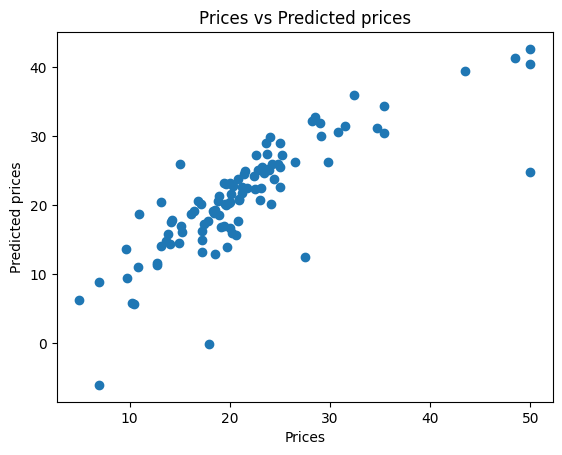

In [23]:
# visualize differences between actual prices and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

#### random forest

In [24]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [25]:
# predict on train data
y_pred = model.predict(X_train_scaled)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Accuracy:', model.score(X_train_scaled,y_train)*100)

R^2: 0.9773485198706289
Adjusted R^2: 0.9765934705329832
MAE: 0.8824282178217824
MSE: 1.9678111806930676
RMSE: 1.4027869334624798
Accuracy: 97.73485198706288


In [26]:
#predict on test data
y_test_pred = model.predict(X_test_scaled)
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Accuracy:', model.score(X_test_scaled,y_test)*100)

R^2: 0.8862635496652348
Adjusted R^2: 0.869461574047599
MAE: 2.0685
MSE: 8.340724186274512
RMSE: 2.888031195516162
Accuracy: 88.62635496652348


Text(0.5, 1.0, 'Prices vs Predicted prices')

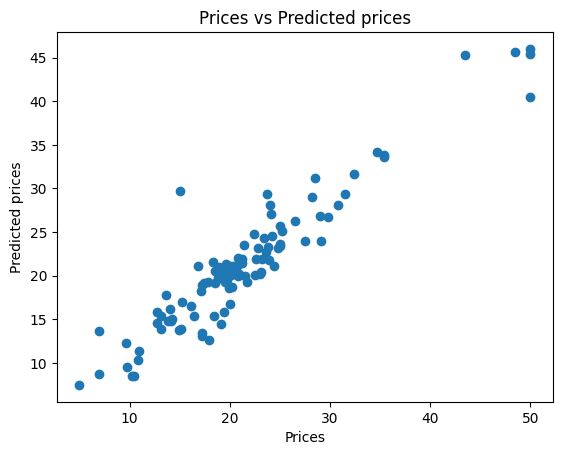

In [27]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

#### XGBooost

In [28]:
model =XGBRegressor()
model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
# predict on train data
y_pred = model.predict(X_train_scaled)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Accuracy:', model.score(X_train_scaled,y_train)*100)

R^2: 0.9999969829984965
Adjusted R^2: 0.9999968824317798
MAE: 0.011182523717974735
MSE: 0.0002620971899759447
RMSE: 0.016189415986253015
Accuracy: 99.99969829984965


In [30]:
#predict on test data
y_test_pred = model.predict(X_test_scaled)
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Accuracy:', model.score(X_test_scaled,y_test)*100)

R^2: 0.9057837838492537
Adjusted R^2: 0.8918654791906208
MAE: 1.8908873698290656
MSE: 6.909231565384943
RMSE: 2.62854171840299
Accuracy: 90.57837838492537


Text(0.5, 1.0, 'Prices vs Predicted prices')

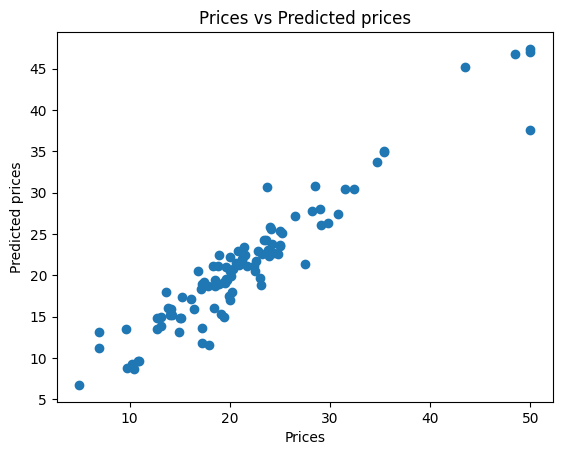

In [31]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

#### decision tree

In [32]:
model = DecisionTreeRegressor(max_depth=5,criterion='squared_error')
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=5)

In [33]:
# predict on train data
y_pred = model.predict(X_train_scaled)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Accuracy:', model.score(X_train_scaled,y_train)*100)

R^2: 0.9185171013474737
Adjusted R^2: 0.9158010047257228
MAE: 1.9637830343184697
MSE: 7.078696760120875
RMSE: 2.660582034089698
Accuracy: 91.85171013474736


In [34]:
#predict on test data
y_test_pred = model.predict(X_test_scaled)
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Accuracy:', model.score(X_test_scaled,y_test)*100)

R^2: 0.885137272531848
Adjusted R^2: 0.868168915064962
MAE: 2.2905097575092417
MSE: 8.423318349352725
RMSE: 2.9022953587381015
Accuracy: 88.51372725318481


Text(0.5, 1.0, 'Prices vs Predicted prices')

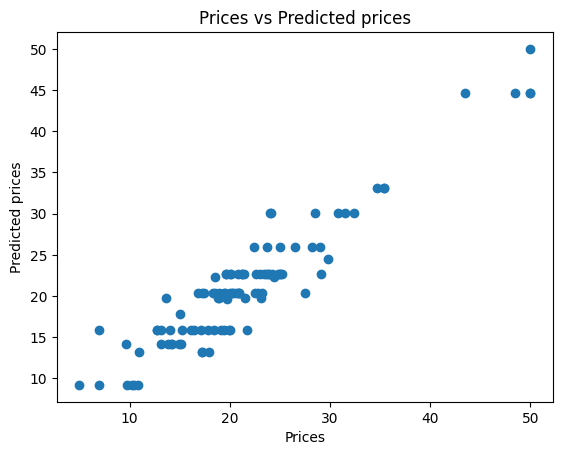

In [35]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")